# **Elo Merchant Category Recommendation**



---



# Table of Contents

>*   [4. Feature Engineering](#section4)
  *   [4.1. Dataset 1 - card_details_train](#section4.1)
  *   [4.2. Dataset 2 - card_details_test](#section4.2)
  *   [4.3. Dataset 3 - merchant_details](#section4.3)
  *   [4.4. Dataset 4 - historical_transactions](#section4.4)
  *   [4.5. Dataset 5 - new_transactions](#section4.5)

>* [5. Feature Visualization](#section5)
  * [5.1. old_purchase_amount](#section5.1)
  * [5.2. old_installments](#section5.2)
  * [5.3. new_purchase_amount](#section5.3)
  * [5.4. new_installments](#section5.4)








---



# Importing Libraries

In [ ]:
# importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt

# Loading Datasets

In [ ]:
#ref: https://www.kaggle.com/fabiendaniel/elo-world
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [ ]:
dataset_path = '/content/drive/MyDrive/Colab Notebooks/Case Study 1/Data/Dataset/'

In [ ]:
# loading the datasets
%%time
card_details_train = pd.read_csv(dataset_path + 'card_details_train_clean.csv', parse_dates=['first_active_month'])
card_details_test = pd.read_csv(dataset_path + 'card_details_test_clean.csv', parse_dates=['first_active_month'])
#merchant_details = pd.read_csv(dataset_path + 'merchant_details_clean.csv')
old_transactions = pd.read_csv(dataset_path + 'old_transactions_clean.csv')
new_transactions = pd.read_csv(dataset_path + 'new_transactions_clean.csv')

print('All preprocessed dataset loaded successfully!')

All preprocessed dataset loaded successfully!
CPU times: user 58.3 s, sys: 13 s, total: 1min 11s
Wall time: 1min 50s


In [ ]:
# reduce the memory of all datasets
old_transactions = reduce_mem_usage(old_transactions)
new_transactions = reduce_mem_usage(new_transactions)

Mem. usage decreased to 1166.08 Mb (62.5% reduction)
Mem. usage decreased to 74.88 Mb (64.3% reduction)


<a name='section4'><a/>
# 4. Feature Engineering

<a name='section4.1'><a/>
## 4.1. Dataset 1: card_details_train

In [ ]:
card_details_train['first_active_month'] = pd.to_datetime(card_details_train.first_active_month)
card_details_train['month'] = card_details_train['first_active_month'].dt.month
card_details_train['year'] = card_details_train['first_active_month'].dt.year

<a name='section4.2'><a/>
## 4.2. Dataset 2: card_details_test

In [ ]:
card_details_test['first_active_month'] = pd.to_datetime(card_details_test.first_active_month)
card_details_test['month'] = card_details_test['first_active_month'].dt.month
card_details_test['year'] = card_details_test['first_active_month'].dt.year

<a name='section4.3'><a/>
## 4.3. Dataset 4: old_transactions

In [ ]:
# applying aggregate function after performing groupby operation
aggs = {}
aggs['purchase_amount'] = ['count','sum','mean','std','min','max']
aggs['installments'] = ['count','sum','mean','std','min','max']

old_transactions_agg = old_transactions.groupby('card_id').agg(aggs)
old_transactions_agg.columns = ['old' + '_' + a + '_' + agg for a in aggs.keys() for agg in aggs[a]]
old_transactions_agg.reset_index(drop=False, inplace=True)

In [ ]:
# merging the above new features with train and test dataset
train = pd.merge(card_details_train, old_transactions_agg, on='card_id', how='left')
test = pd.merge(card_details_test, old_transactions_agg, on='card_id', how='left')

<a name='section4.4'><a/>
## 4.4. Dataset 5: new_transactions

In [ ]:
# applying aggregate function after performing groupby operation
aggs = {}
aggs['purchase_amount'] = ['count','sum','mean','std','min','max']
aggs['installments'] = ['count','sum','mean','std','min','max']

new_transactions_agg = new_transactions.groupby('card_id').agg(aggs)
new_transactions_agg.columns = ['new' + '_' + a + '_' + agg for a in aggs.keys() for agg in aggs[a]]
new_transactions_agg.reset_index(drop=False, inplace=True)

In [ ]:
# merging the above new features with train and test dataset
train = pd.merge(train, new_transactions_agg, on='card_id', how='left')
test = pd.merge(test, new_transactions_agg, on='card_id', how='left')

In [ ]:
# checking for missing values after group by operation
print('----------Missing value in train set----------')
print(train.columns[train.isnull().any()])

print('=============================================================')

print('----------Missing value in test set----------')
print(test.columns[test.isnull().any()])

----------Missing value in train set----------
Index(['new_purchase_amount_count', 'new_purchase_amount_sum',
       'new_purchase_amount_mean', 'new_purchase_amount_std',
       'new_purchase_amount_min', 'new_purchase_amount_max',
       'new_installments_count', 'new_installments_sum',
       'new_installments_mean', 'new_installments_std', 'new_installments_min',
       'new_installments_max'],
      dtype='object')
----------Missing value in test set----------
Index(['new_purchase_amount_count', 'new_purchase_amount_sum',
       'new_purchase_amount_mean', 'new_purchase_amount_std',
       'new_purchase_amount_min', 'new_purchase_amount_max',
       'new_installments_count', 'new_installments_sum',
       'new_installments_mean', 'new_installments_std', 'new_installments_min',
       'new_installments_max'],
      dtype='object')


In [ ]:
# missing value imputation with mode value in train and test set
missing_col = ['new_purchase_amount_count', 'new_purchase_amount_sum',
               'new_purchase_amount_mean', 'new_purchase_amount_std',
               'new_purchase_amount_min', 'new_purchase_amount_max',
               'new_installments_count', 'new_installments_sum',
               'new_installments_mean', 'new_installments_std', 
               'new_installments_min', 'new_installments_max']

for i in missing_col:
  train[i].fillna(train[i].mode()[0], inplace=True)

for i in missing_col:
  test[i].fillna(test[i].mode()[0], inplace=True)

print('All missing values imputed!')

All missing values imputed!


In [ ]:
train.shape, test.shape

((201917, 32), (123623, 31))

<a name='section5'><a/>
# 5. Feature Vizualization

<a name='section5.1'><a/>
## 5.1. old_purchase_amount

(a). How does count of old purchase impact target

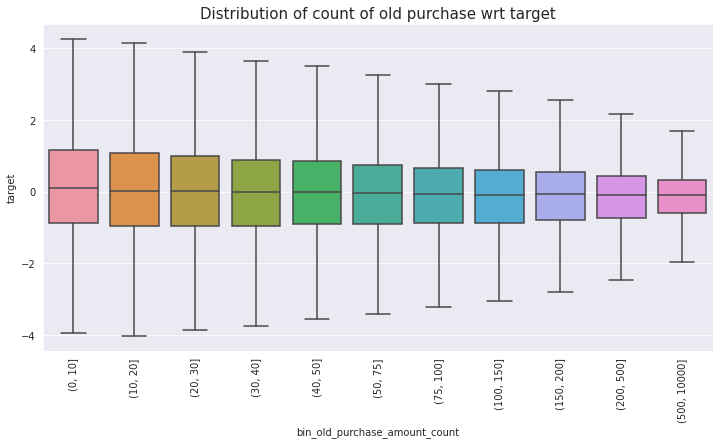

In [ ]:
# ref: https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-elo
bins = [0, 10, 20, 30, 40, 50, 75, 100, 150, 200, 500, 10000]
train['bin_old_purchase_amount_count'] = pd.cut(train['old_purchase_amount_count'], bins)

plt.figure(figsize=(12,6))
sns.boxplot(x="bin_old_purchase_amount_count", y='target', data=train, showfliers=False)
plt.xticks(rotation='vertical')
plt.title('Distribution of count of old purchase wrt target', fontsize=15)
plt.show()

Observation(s):

*   Loyalty score seems to decrease with the increase in number of old transactions.



(b). How does sum of old purchase amount impact target

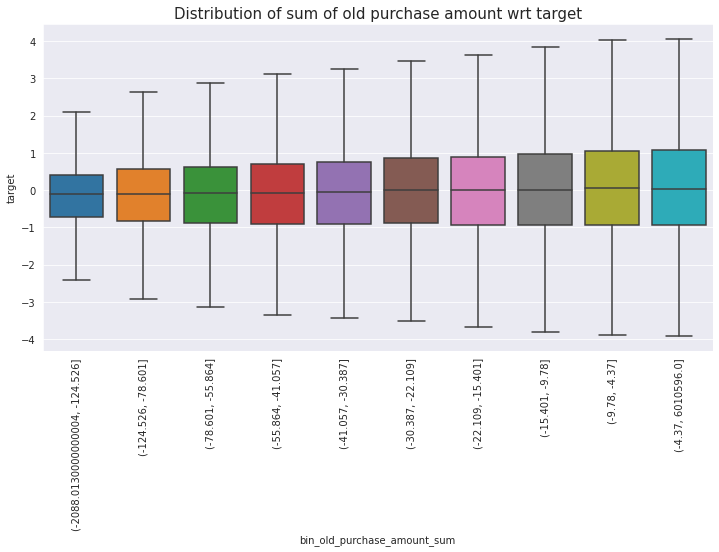

In [ ]:
train['bin_old_purchase_amount_sum'] = pd.qcut(train['old_purchase_amount_sum'], q=10)
plt.figure(figsize=(12,6))
sns.boxplot(x="bin_old_purchase_amount_sum", y='target', data=train, showfliers=False)
plt.xticks(rotation='vertical')
plt.title('Distribution of sum of old purchase amount wrt target', fontsize=15)
plt.show()

Observation(s):

*   Loyalty score seems to increase with the increase in total old purchase amount



(c). How does mean of old purchase amount impact target

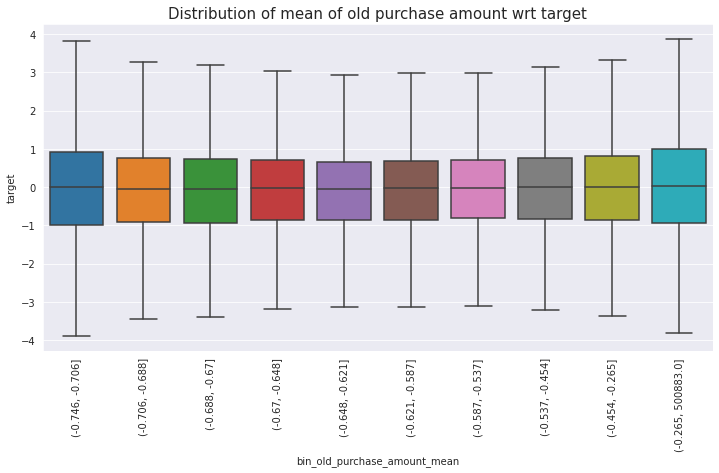

In [ ]:
train['bin_old_purchase_amount_mean'] = pd.qcut(train['old_purchase_amount_mean'], q=10)
plt.figure(figsize=(12,6))
sns.boxplot(x="bin_old_purchase_amount_mean", y='target', data=train, showfliers=False)
plt.xticks(rotation='vertical')
plt.title('Distribution of mean of old purchase amount wrt target', fontsize=15)
plt.show()

Observation(s):

*   Loyalty score seems to first decrease and then increase with the increase in old purchase amount mean.



(d). How does std of old purchase amount impact target

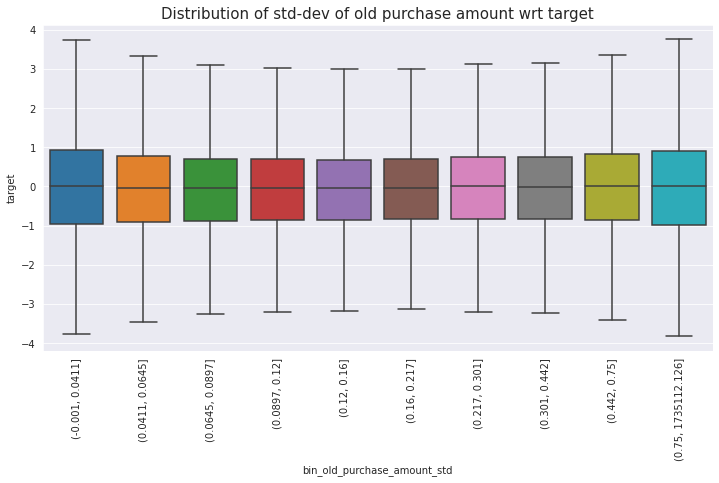

In [ ]:
train['bin_old_purchase_amount_std'] = pd.qcut(train['old_purchase_amount_std'], q=10)
plt.figure(figsize=(12,6))
sns.boxplot(x="bin_old_purchase_amount_std", y='target', data=train, showfliers=False)
plt.xticks(rotation='vertical')
plt.title('Distribution of std-dev of old purchase amount wrt target', fontsize=15)
plt.show()

Observation(s):

*   Loyalty score seems to first decrease and then increase with the increase in old purchase amount standard deviation.


(e). How does min of old purchase amount impact target

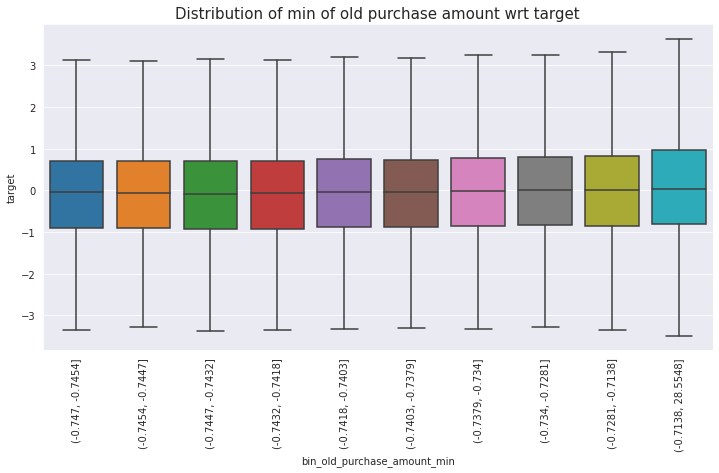

In [ ]:
train['bin_old_purchase_amount_min'] = pd.qcut(train['old_purchase_amount_min'], q=10)
plt.figure(figsize=(12,6))
sns.boxplot(x="bin_old_purchase_amount_min", y='target', data=train, showfliers=False)
plt.xticks(rotation='vertical')
plt.title('Distribution of min of old purchase amount wrt target', fontsize=15)
plt.show()

Observation(s):

*   Loyalty score seems to stay almost same throughout and then increase slightly in last few bins with the increase in old purchase amount minimum value.


(f). How does max of old purchase amount impact target

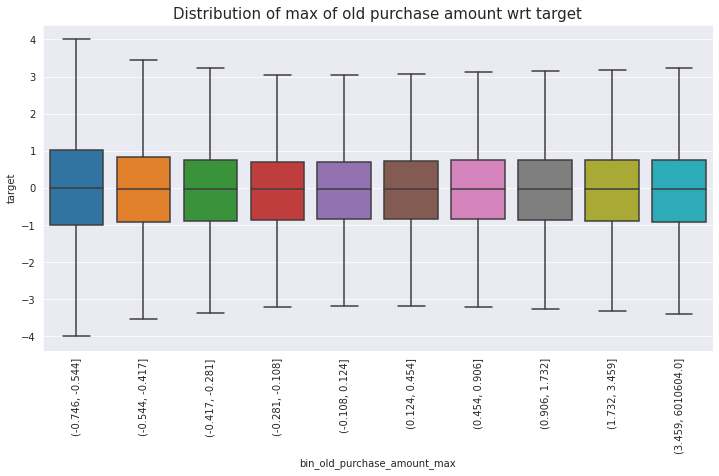

In [ ]:
train['bin_old_purchase_amount_max'] = pd.qcut(train['old_purchase_amount_max'], q=10)
plt.figure(figsize=(12,6))
sns.boxplot(x="bin_old_purchase_amount_max", y='target', data=train, showfliers=False)
plt.xticks(rotation='vertical')
plt.title('Distribution of max of old purchase amount wrt target', fontsize=15)
plt.show()

Observation(s):

*   Loyalty score seems to decrease slightly with the increase in old purchase amount maximum value.


In [ ]:
# dropping the temporary bin columns
train.drop(['bin_old_purchase_amount_count','bin_old_purchase_amount_sum','bin_old_purchase_amount_mean','bin_old_purchase_amount_std','bin_old_purchase_amount_min','bin_old_purchase_amount_max'], axis = 1, inplace=True)

<a name='section5.2'><a/>
## 5.2. old_installments

(a). How does count of old installments impact target

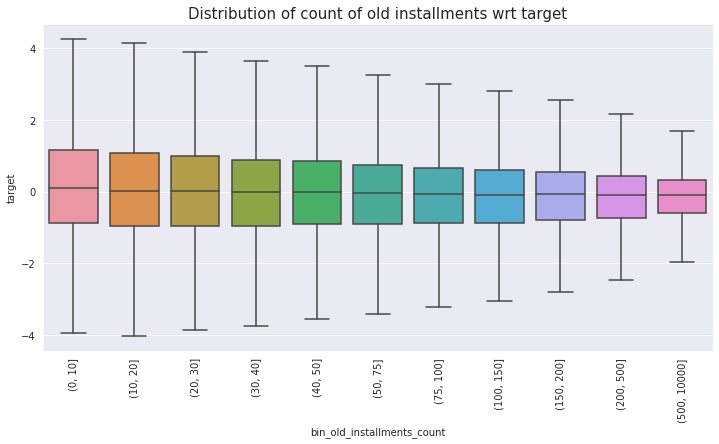

In [ ]:
bins = [0, 10, 20, 30, 40, 50, 75, 100, 150, 200, 500, 10000]
train['bin_old_installments_count'] = pd.cut(train['old_installments_count'], bins)

plt.figure(figsize=(12,6))
sns.boxplot(x="bin_old_installments_count", y='target', data=train, showfliers=False)
plt.xticks(rotation='vertical')
plt.title('Distribution of count of old installments wrt target', fontsize=15)
plt.show()

Observation(s):

*   Loyalty score seems to decrease with the increase in total number of old installments.


(b). How does sum of old installments impact target

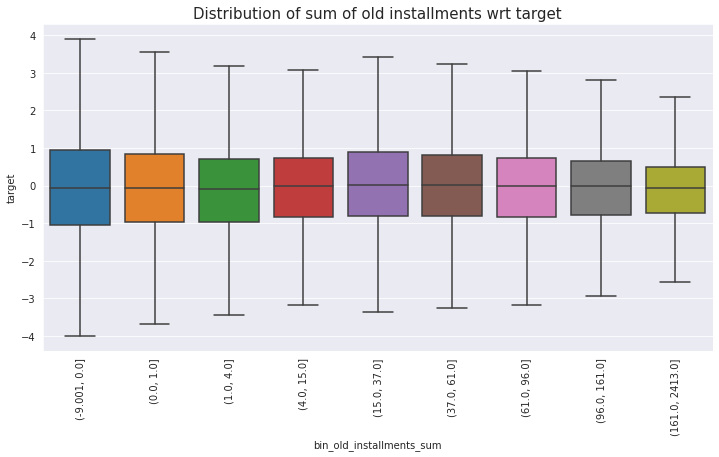

In [ ]:
train['bin_old_installments_sum'] = pd.qcut(train['old_installments_sum'], q=10, duplicates='drop')
plt.figure(figsize=(12,6))
sns.boxplot(x="bin_old_installments_sum", y='target', data=train, showfliers=False)
plt.xticks(rotation='vertical')
plt.title('Distribution of sum of old installments wrt target', fontsize=15)
plt.show()

Observation(s):

*   Loyalty score seems to decrease with the increase in old installments sum but slight deviation in loyalty score can also be seen in cente bins.


(c). How does mean of old installments impact target

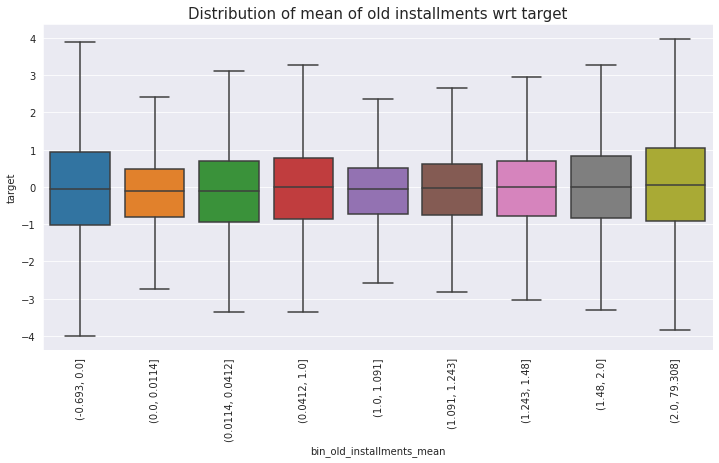

In [ ]:
train['bin_old_installments_mean'] = pd.qcut(train['old_installments_mean'], q=10, duplicates='drop')
plt.figure(figsize=(12,6))
sns.boxplot(x="bin_old_installments_mean", y='target', data=train, showfliers=False)
plt.xticks(rotation='vertical')
plt.title('Distribution of mean of old installments wrt target', fontsize=15)
plt.show()

Observation(s):

*   Loyalty score seems to vary throughout but slight more deviation can be seen in the initial and last phase with the increase in old installmets mean.


(d). How does std of old installments impact target

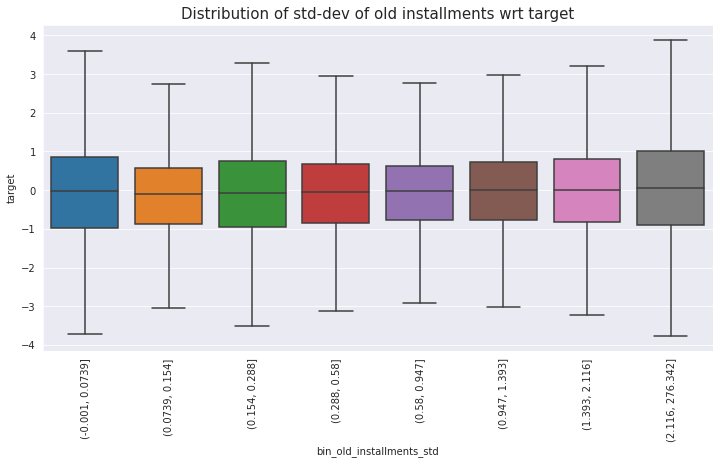

In [ ]:
train['bin_old_installments_std'] = pd.qcut(train['old_installments_std'], q=10, duplicates='drop')
plt.figure(figsize=(12,6))
sns.boxplot(x="bin_old_installments_std", y='target', data=train, showfliers=False)
plt.xticks(rotation='vertical')
plt.title('Distribution of std-dev of old installments wrt target', fontsize=15)
plt.show()

Observation(s):

*   Loyalty score seems to vary throughout but slight more deviation can be seen in the initial and last phase with the increase in old installmets standard deviation.


(e). How does min of old installments impact target

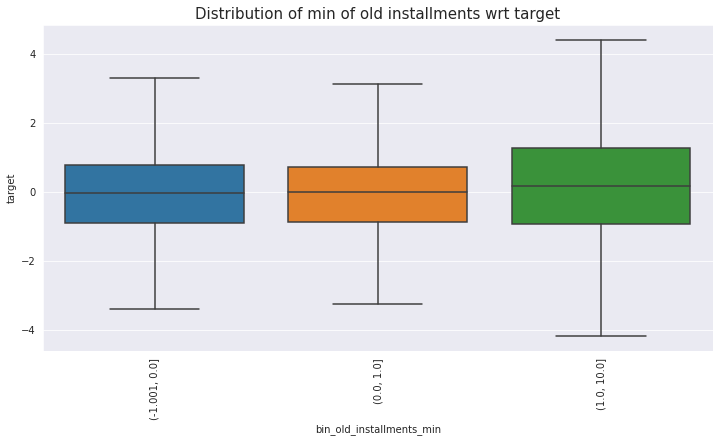

In [ ]:
train['bin_old_installments_min'] = pd.qcut(train['old_installments_min'], q=10, duplicates='drop')
plt.figure(figsize=(12,6))
sns.boxplot(x="bin_old_installments_min", y='target', data=train, showfliers=False)
plt.xticks(rotation='vertical')
plt.title('Distribution of min of old installments wrt target', fontsize=15)
plt.show()

Observation(s):

*   Loyalty score seems to stay almost same in the initial range but increases slightly in the last range with the increase in old installments minimum value.


(f). How does max of old installments impact target

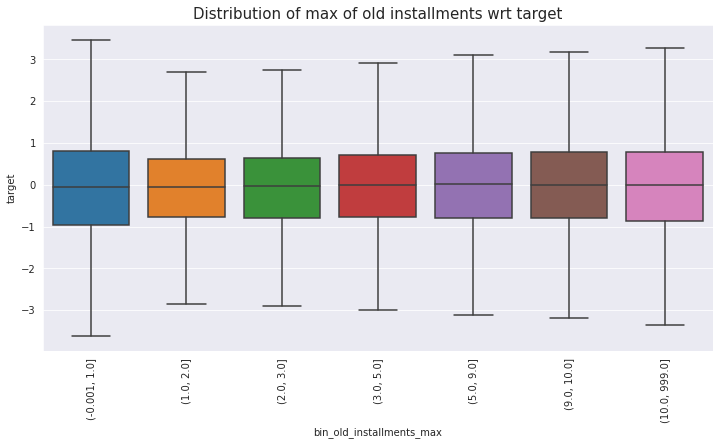

In [ ]:
train['bin_old_installments_max'] = pd.qcut(train['old_installments_max'], q=10, duplicates='drop')
plt.figure(figsize=(12,6))
sns.boxplot(x="bin_old_installments_max", y='target', data=train, showfliers=False)
plt.xticks(rotation='vertical')
plt.title('Distribution of max of old installments wrt target', fontsize=15)
plt.show()

Observation(s):

*   Loyalty score seems to vary slightly throughout with the increase in old installments maximum value.


In [ ]:
# dropping the temporary bin columns
train.drop(['bin_old_installments_count','bin_old_installments_sum','bin_old_installments_mean','bin_old_installments_std','bin_old_installments_min','bin_old_installments_max'], axis = 1, inplace=True)

<a name='section5.3'><a/>
## 5.3. new_purchase_amount

(a). How does count of new purchase impact target

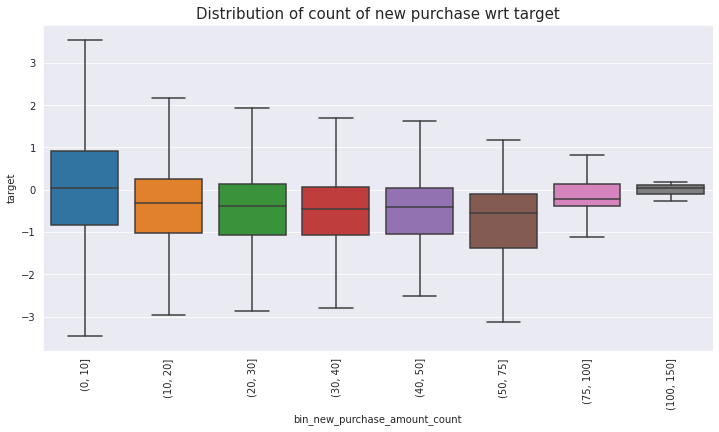

In [ ]:
bins = [0, 10, 20, 30, 40, 50, 75, 100, 150]
train['bin_new_purchase_amount_count'] = pd.cut(train['new_purchase_amount_count'], bins)

plt.figure(figsize=(12,6))
sns.boxplot(x="bin_new_purchase_amount_count", y='target', data=train, showfliers=False)
plt.xticks(rotation='vertical')
plt.title('Distribution of count of new purchase wrt target', fontsize=15)
plt.show()

Observation(s):

*   Loyalty score seems to decrease with the increase in total new purchase amount but least distribution of loyalty score can also be seen in the last bin.
*   More of the negative loyalty score can be seen with the increase in total new purchase amount.


(b). How does sum of new purchase amount impact target

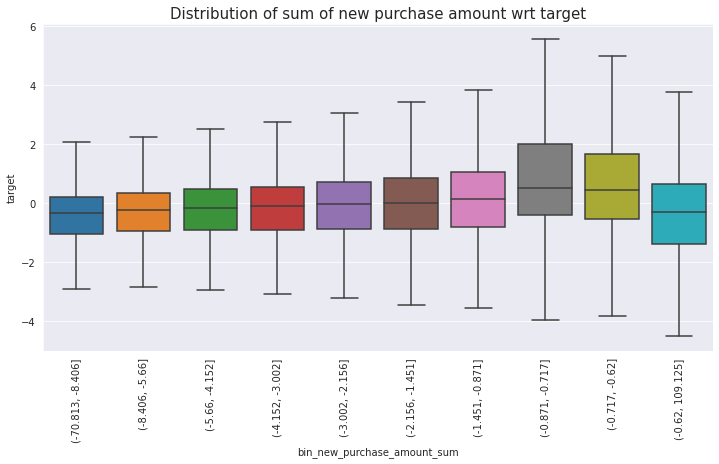

In [ ]:
train['bin_new_purchase_amount_sum'] = pd.qcut(train['new_purchase_amount_sum'], q=10)
plt.figure(figsize=(12,6))
sns.boxplot(x="bin_new_purchase_amount_sum", y='target', data=train, showfliers=False)
plt.xticks(rotation='vertical')
plt.title('Distribution of sum of new purchase amount wrt target', fontsize=15)
plt.show()

Observation(s):

*   Loyalty score seems to increase with the increase in total new purchase amount.
*   More of the negative score can be observed in the last bins.


(c). How does mean of new purchase amount impact target

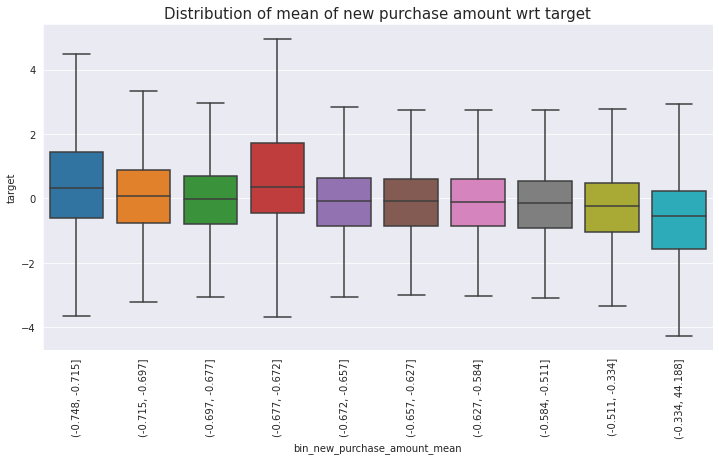

In [ ]:
train['bin_new_purchase_amount_mean'] = pd.qcut(train['new_purchase_amount_mean'], q=10)
plt.figure(figsize=(12,6))
sns.boxplot(x="bin_new_purchase_amount_mean", y='target', data=train, showfliers=False)
plt.xticks(rotation='vertical')
plt.title('Distribution of mean of new purchase amount wrt target', fontsize=15)
plt.show()

Observation(s):

*   Loyalty score seems to increase in the first and last 2 bins but stay almost same in the middle range with the increase in new purchase amount mean.


(d). How does std of new purchase amount impact target

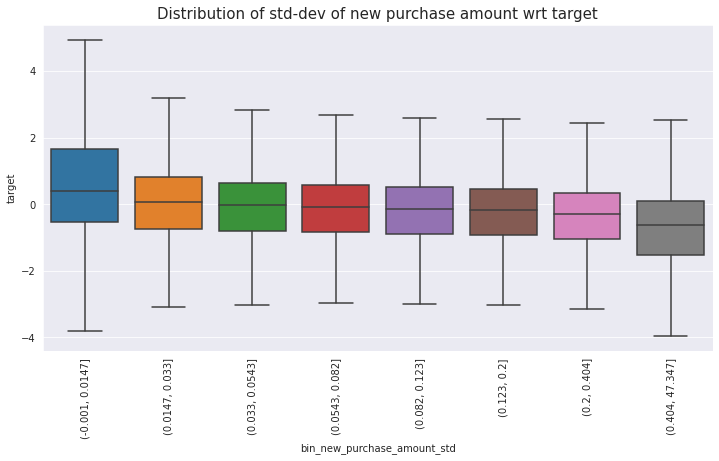

In [ ]:
train['bin_new_purchase_amount_std'] = pd.qcut(train['new_purchase_amount_std'], q=10, duplicates='drop')
plt.figure(figsize=(12,6))
sns.boxplot(x="bin_new_purchase_amount_std", y='target', data=train, showfliers=False)
plt.xticks(rotation='vertical')
plt.title('Distribution of std-dev of new purchase amount wrt target', fontsize=15)
plt.show()

Observation(s):

*   Loyalty score seems to vary throughout with the increase in new purchase amount standard deviation.


(e). How does min of new purchase amount impact target

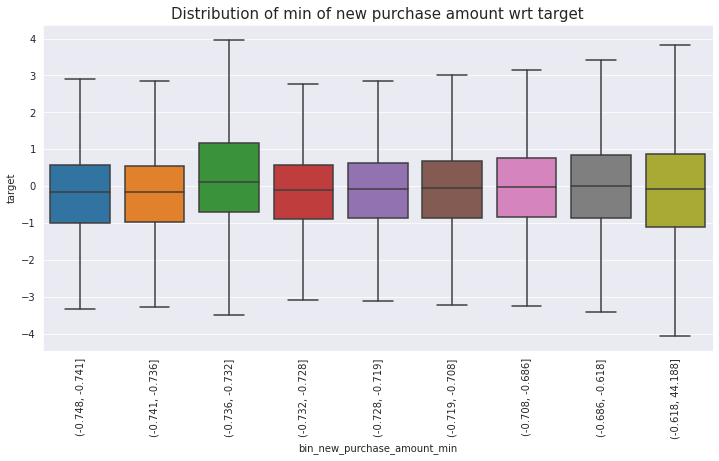

In [ ]:
train['bin_new_purchase_amount_min'] = pd.qcut(train['new_purchase_amount_min'], q=10, duplicates='drop')
plt.figure(figsize=(12,6))
sns.boxplot(x="bin_new_purchase_amount_min", y='target', data=train, showfliers=False)
plt.xticks(rotation='vertical')
plt.title('Distribution of min of new purchase amount wrt target', fontsize=15)
plt.show()

Observation(s):

*   Loyalty score seems to stay almost same throughout but increases slightly in the last few range with the increase in new purchase amount minimum value.


(f). How does max of new purchase amount impact target

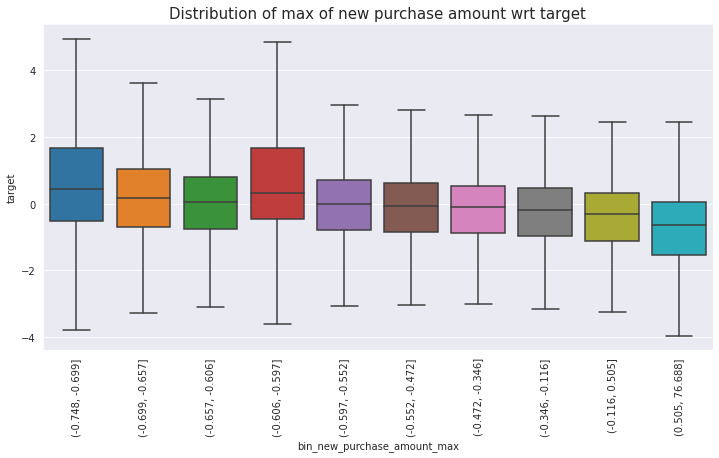

In [ ]:
train['bin_new_purchase_amount_max'] = pd.qcut(train['new_purchase_amount_max'], q=10)
plt.figure(figsize=(12,6))
sns.boxplot(x="bin_new_purchase_amount_max", y='target', data=train, showfliers=False)
plt.xticks(rotation='vertical')
plt.title('Distribution of max of new purchase amount wrt target', fontsize=15)
plt.show()

Observation(s):

*   Loyalty score seems to vary throughout with the increase in new purchase amount maximum value.


In [ ]:
# dropping the temporary bin columns
train.drop(['bin_new_purchase_amount_count','bin_new_purchase_amount_sum','bin_new_purchase_amount_mean','bin_new_purchase_amount_std','bin_new_purchase_amount_min','bin_new_purchase_amount_max'], axis = 1, inplace=True)

<a name='section5.4'><a/>
## 5.4. new_installments

(a). How does count of new installments impact target

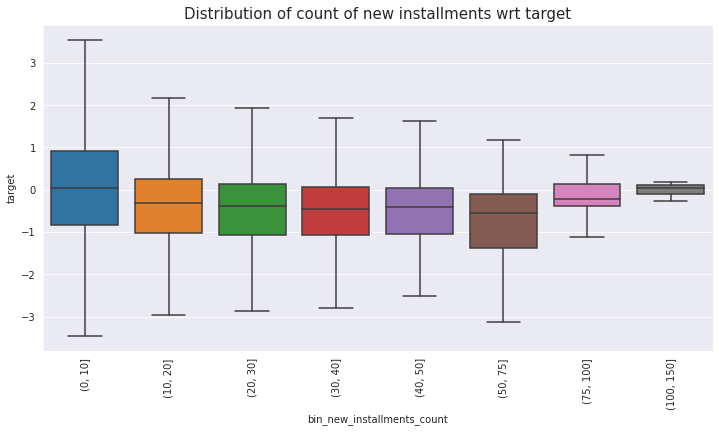

In [ ]:
bins = [0, 10, 20, 30, 40, 50, 75, 100, 150]
train['bin_new_installments_count'] = pd.cut(train['new_installments_count'], bins)

plt.figure(figsize=(12,6))
sns.boxplot(x="bin_new_installments_count", y='target', data=train, showfliers=False)
plt.xticks(rotation='vertical')
plt.title('Distribution of count of new installments wrt target', fontsize=15)
plt.show()

Observation(s):

*   Loyalty score seems to decrease with the increase in total new purchase amount but least distribution can also be observed in the last range.
*   More of the negative loyalty score can be seen with the increase in total number of new installments.


(b). How does sum of new installments impact target

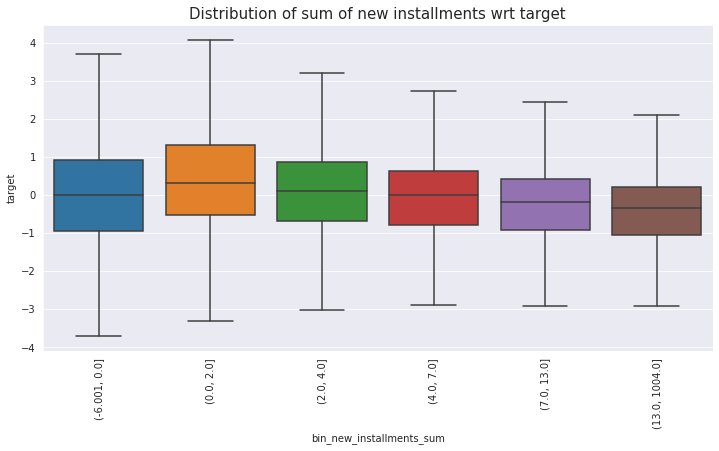

In [ ]:
train['bin_new_installments_sum'] = pd.qcut(train['new_installments_sum'], q=10, duplicates='drop')
plt.figure(figsize=(12,6))
sns.boxplot(x="bin_new_installments_sum", y='target', data=train, showfliers=False)
plt.xticks(rotation='vertical')
plt.title('Distribution of sum of new installments wrt target', fontsize=15)
plt.show()

Observation(s):

*   Loyalty score seems to first increase and then decreases with the increase in total new installments.


(c). How does mean of new installments impact target

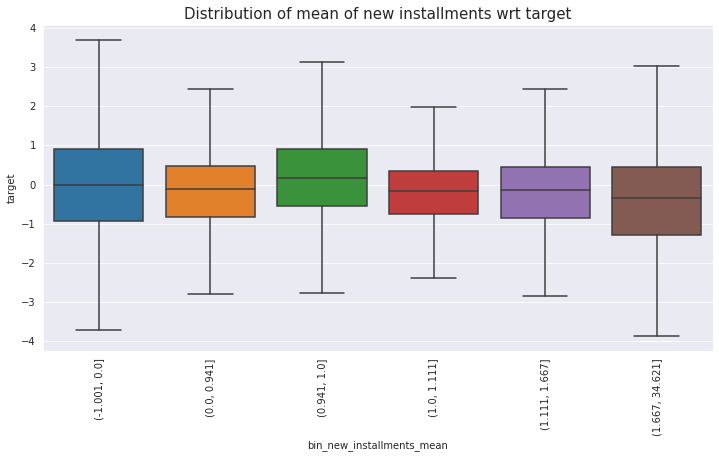

In [ ]:
train['bin_new_installments_mean'] = pd.qcut(train['new_installments_mean'], q=10, duplicates='drop')
plt.figure(figsize=(12,6))
sns.boxplot(x="bin_new_installments_mean", y='target', data=train, showfliers=False)
plt.xticks(rotation='vertical')
plt.title('Distribution of mean of new installments wrt target', fontsize=15)
plt.show()

Observation(s):

*   Loyalty score seems vary throughout with the increase in new installments mean.


(d). How does std of new installments impact target

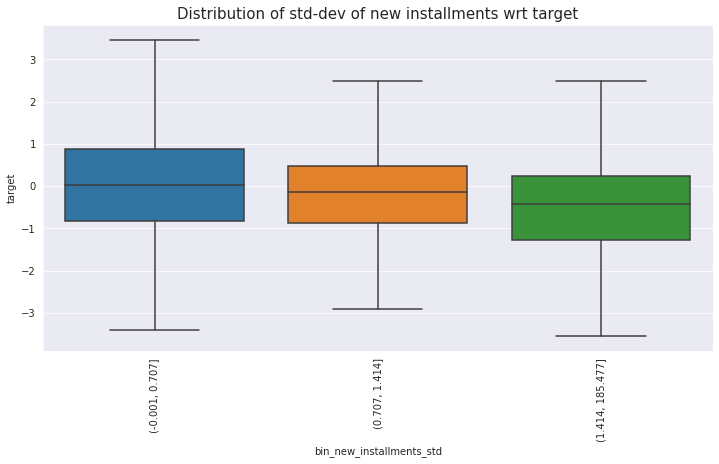

In [ ]:
train['bin_new_installments_std'] = pd.qcut(train['new_installments_std'], q=10, duplicates='drop')
plt.figure(figsize=(12,6))
sns.boxplot(x="bin_new_installments_std", y='target', data=train, showfliers=False)
plt.xticks(rotation='vertical')
plt.title('Distribution of std-dev of new installments wrt target', fontsize=15)
plt.show()

Observation(s):

*   Loyalty score seems to vary throughout with the increase in new installments standard deviation.


(e). How does min of new installments impact target

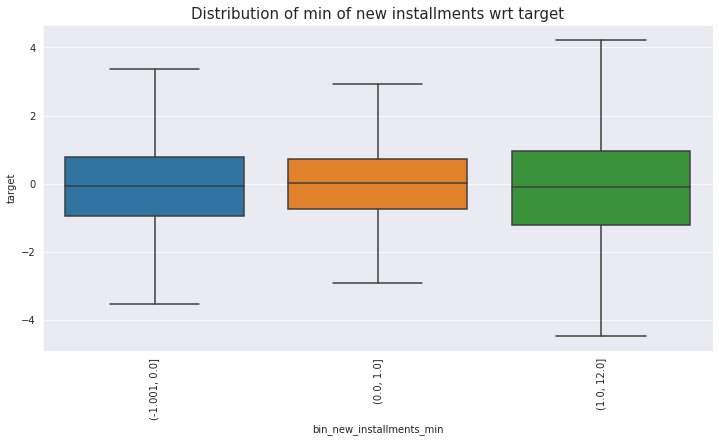

In [ ]:
train['bin_new_installments_min'] = pd.qcut(train['new_installments_min'], q=10, duplicates='drop')
plt.figure(figsize=(12,6))
sns.boxplot(x="bin_new_installments_min", y='target', data=train, showfliers=False)
plt.xticks(rotation='vertical')
plt.title('Distribution of min of new installments wrt target', fontsize=15)
plt.show()

Observation(s):

*   Loyalty score seems to first decrease and then increase with the increase in new installments minimum value.


(f). How does max of new installments impact target

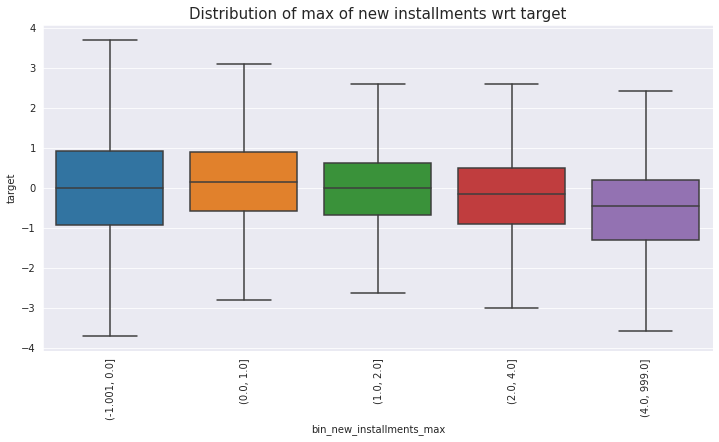

In [ ]:
train['bin_new_installments_max'] = pd.qcut(train['new_installments_max'], q=10, duplicates='drop')
plt.figure(figsize=(12,6))
sns.boxplot(x="bin_new_installments_max", y='target', data=train, showfliers=False)
plt.xticks(rotation='vertical')
plt.title('Distribution of max of new installments wrt target', fontsize=15)
plt.show()

Observation(s):

*   Loyalty score seems to decrease with the increase in new installments maximum value.


In [ ]:
# dropping the temporary bin columns
train.drop(['bin_new_installments_count','bin_new_installments_sum','bin_new_installments_mean','bin_new_installments_std','bin_new_installments_min','bin_new_installments_max'], axis = 1, inplace=True)



---



Save the final dataset

In [ ]:
train.shape, test.shape

((201917, 32), (123623, 31))

In [ ]:
train.to_csv(dataset_path + 'train_FE1.csv', index=False)
test.to_csv(dataset_path + 'test_FE1.csv', index=False)



---



# References:

*   https://www.kaggle.com/c/elo-merchant-category-recommendation
*   https://stackoverflow.com/
*   https://seaborn.pydata.org/

